In [34]:
import pandas as pd
import numpy as np

from math import sqrt

import matplotlib.pyplot as plt

In [39]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [2]:
critics={
    'BTS':{'암수살인':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '레드벨벳':{'암수살인':2.5, '바울':2, '할로윈':1},
    '트와이스':{'암수살인':3.5, '바울':4, '할로윈':5}
}

In [4]:
critics['BTS']
critics.get('BTS')

{'암수살인': 5, '바울': 4, '할로윈': 1.5}

In [6]:
print(critics.get('super'))

None


In [7]:
critics.get('BTS').get('바울')

4

In [11]:
# 두 점 사이의 거리
def sim(i,j):
    return sqrt(pow(i,2)+pow(j,2))

In [17]:
v1=critics['손흥민']['바울']-critics['레드벨벳']['바울']
v2=critics['레드벨벳']['할로윈']-critics['손흥민']['할로윈']
print(sim(v1,v2))

3.1622776601683795


In [44]:
# 피타고라스 활용 두 점 사이의 거라
for i in critics:
    if i != '손흥민':
        d1=critics.get('손흥민').get('바울')- critics.get(i).get('바울')
    if i != '손흥민':
        d2=critics.get('손흥민').get('할로윈')- critics.get(i).get('할로윈')
        print(i, '와의 거리 : ',sim(d1,d2))
    

BTS 와의 거리 :  1.118033988749895
레드벨벳 와의 거리 :  3.1622776601683795
트와이스 와의 거리 :  3.1622776601683795


In [46]:
# 피타고라스 활용 유사도 측정
for i in critics:
    if i != '손흥민':
        d1=critics.get('손흥민').get('바울')- critics.get(i).get('바울')
    if i != '손흥민':
        d2=critics.get('손흥민').get('할로윈')- critics.get(i).get('할로윈')
        #print(i, '와의 거리 : ',sim(d1,d2))
        print(i, '와의 유사도 : ',1/(sim(d1,d2)+1))

BTS 와의 유사도 :  0.4721359549995794
레드벨벳 와의 유사도 :  0.2402530733520421
트와이스 와의 유사도 :  0.2402530733520421


In [ ]:
# n차원 활용 

In [23]:
def sim_distance(data,name1,name2):
    sum=0
    for i in data[name1]:
        if i in data[name2]:
            sum+=pow(data[name1][i]-data[name2][i],2)
    return 1/(sqrt(sum)+1)
    
sim_distance(critics,'BTS','손흥민')

0.4721359549995794

In [33]:
# top_match(영화평점data,기준관객,등수,유사도함수)
# critics에서 BTS와 공통으로 본 영화 중, 평점이 가장 유사한 관객 n명 추출
def top_match(data,name,rank=3,simf=sim_distance):
    sim_list=[]
    for i in data:
        if name != i:
            sim_list.append((simf(data,name,i),i))
            sim_list.sort()
            sim_list.reverse()
    return sim_list[:rank]

print(top_match(critics,'BTS',2))

[(0.4721359549995794, '손흥민'), (0.23582845781094, '레드벨벳')]


In [40]:
def barplot(data,lab):
    pos=range(len(data))
    plt.barh(pos,data,height=0.5,color='b')
    plt.xlabel('similarity')
    plt.ylabel('name')
    plt.yticks(pos,lab)
    plt.show()

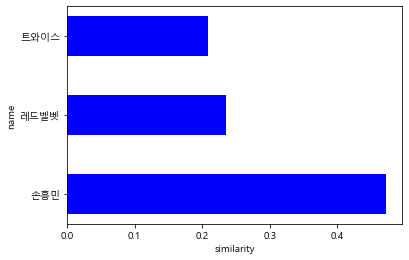

In [41]:
match_list=top_match(critics,'BTS',3)  
score_list=[]
name_list=[]
for i in match_list:
    score_list.append(i[0])
    name_list.append(i[1])
    
barplot(score_list,name_list)

In [47]:
critics = {
    '레드벨벳': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '블랙핑크': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '소녀시대': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '마마무': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '오마이걸': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '모모랜드': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '우주소녀': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0},
}

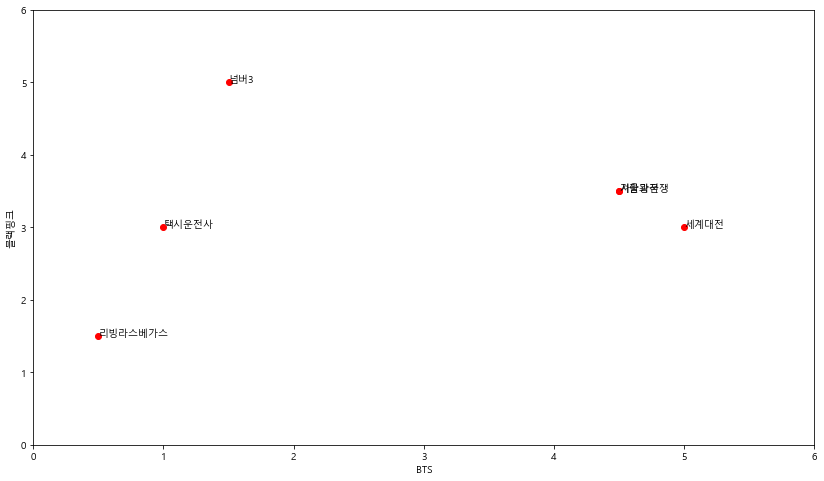

In [55]:
def scoregraph(data,n1,n2):
    plt.figure(figsize=(14,8))
    
    list1=[]
    list2=[]
    for i in data[n1]:
        if i in data[n2]:
            list1.append(data[n1][i])
            list2.append(data[n2][i])
            plt.text(data[n1][i],data[n2][i],i)
    plt.plot(list1,list2,'ro')
    plt.xlabel(n1)
    plt.ylabel(n2)
    plt.axis([0,6,0,6])
    plt.show()
    
scoregraph(critics, 'BTS','블랙핑크')

In [57]:
#  특정 관객에 대한 상관계수
def sim_pearson(data,n1,n2):
    sumx=0
    sumy=0
    sumsqx=0
    sumsqy=0
    sumxy=0
    cnt=0
    for i in data[n1]:
        if i in data[n2]:
            sumx+=data[n1][i]
            sumy+=data[n2][i]
            sumsqx+=pow(data[n1][i],2)
            sumsqy+=pow(data[n2][i],2)
            sumxy+=data[n1][i]*data[n2][i]
            cnt+=1
    return (sumxy-((sumx*sumy)/cnt)) / sqrt((sumsqx-(pow(sumx,2)/cnt))*(sumsqy-(pow(sumy,2)/cnt)))  

sim_pearson(critics, 'BTS', '블랙핑크')

0.21693045781865616

In [58]:
# 전체 관객에 대한 상관계수
# critics에서 BTS와 공통으로 본 영화 중, 상관계수가 가장 높은 관객 n명 추출
def top_match(data,name,rank=3,simf=sim_pearson):
    sim_list=[]
    for i in data:
        if name != i:
            sim_list.append((simf(data,name,i),i))
            sim_list.sort()
            sim_list.reverse()
    return sim_list[:rank]

print(top_match(critics,'BTS',5))

[(0.5692099788303083, '소녀시대'), (0.41791069697885247, '오마이걸'), (0.21693045781865616, '블랙핑크'), (0.15430334996209194, '마마무'), (0.05477225575051661, '레드벨벳')]


In [62]:
# 1) 평점 추측 = 유사도 * 상대방의 평점
# 2) 추측 평점의 총합 / 유사도 총합  -> 모든 관객을 고려했을 때 예상되는 평점
# 3) 예상 평점을 기준으로 예상 평점이 가장 높은 영화 추천

def recommendation(data,person,simf=sim_pearson):
    res=top_match(data,person,len(data))
    
    simsum=0  # 상관계수(유사도) 합
    score_dic={}  # 예상 평점 총합
    sim_dic={}   # 유사도 총합
    list=[]
    for sim, name in res:
        if sim<0 : continue
        for movie in data[name]:
            if movie not in data[person]:
                simsum+=sim*data[name][movie]
                score_dic.setdefault(movie,0)
                score_dic[movie]+=simsum
                
                sim_dic.setdefault(movie,0)
                sim_dic[movie]+=sim
    
  
            simsum=0  # 영화 변경  ->  0으로 초기화
    
    for key in score_dic:
        score_dic[key]=score_dic[key]/sim_dic[key]
        list.append((score_dic[key],key))
    list.sort()
    list.reverse()
    return list

In [63]:
recommendation(critics,'소녀시대')

[(3.0761574975571793, '사랑과전쟁'), (2.1938491995536373, '리빙라스베가스')]

In [ ]:
# 상관계수 높은 사람 5명
# 안 본 영화 중 추천 점수가 높은 순으로 (제목,예상평점) 출력

In [112]:
path=r'C:\\Users\\student\\Desktop\\공부\\멀캠TIL\\dataset\\python\\영화평점'

data=pd.read_excel(path+'\\영화평점.xlsx')
list(data.이름)

['고재형',
 '김건우',
 '박경호',
 '박찬',
 '김경아',
 '정서영',
 '정한음',
 '오종민',
 '차유화',
 '이성천',
 '이은성',
 '김나연',
 '조준형',
 '김태현',
 '한미래',
 '조현진',
 '유기욱',
 '김경한',
 '신아영',
 '엄다연']

In [123]:
# data.loc[10]

# data.to_dict('split')
# {'index': data.columns, 'columns': list(data.이름),
#  'data': [[1, 0.5], [2, 0.75]]}
#data.to_dict()
#'이름' - 0 - 이름
#'명량' - 0 -  평점
data=data.set_index("이름")

KeyError: "None of ['이름'] are in the columns"

In [126]:
dic_data=data.T.to_dict()

In [127]:
dic_data

{'고재형': {'명량': nan,
  '국제시장': nan,
  '아바타': 4.5,
  '택시운전사': 3.5,
  '부산행': 4.0,
  '변호인': nan,
  '겨울왕국': 4.0,
  '기생충': 4.0},
 '김건우': {'명량': 4.0,
  '국제시장': 4.5,
  '아바타': nan,
  '택시운전사': nan,
  '부산행': nan,
  '변호인': 3.5,
  '겨울왕국': 2.5,
  '기생충': nan},
 '박경호': {'명량': 4.0,
  '국제시장': 5.0,
  '아바타': 4.5,
  '택시운전사': nan,
  '부산행': 2.0,
  '변호인': 3.5,
  '겨울왕국': 0.0,
  '기생충': 5.0},
 '박찬': {'명량': 4.0,
  '국제시장': 5.0,
  '아바타': 3.0,
  '택시운전사': nan,
  '부산행': 4.5,
  '변호인': 3.5,
  '겨울왕국': 3.0,
  '기생충': 5.0},
 '김경아': {'명량': 4.0,
  '국제시장': 4.0,
  '아바타': nan,
  '택시운전사': 4.0,
  '부산행': 4.0,
  '변호인': 3.0,
  '겨울왕국': 4.0,
  '기생충': 5.0},
 '정서영': {'명량': 3.0,
  '국제시장': 2.0,
  '아바타': 5.0,
  '택시운전사': 3.0,
  '부산행': 1.0,
  '변호인': nan,
  '겨울왕국': 3.0,
  '기생충': 5.0},
 '정한음': {'명량': 4.0,
  '국제시장': 5.0,
  '아바타': 5.0,
  '택시운전사': 4.0,
  '부산행': 5.0,
  '변호인': nan,
  '겨울왕국': 5.0,
  '기생충': nan},
 '오종민': {'명량': 3.0,
  '국제시장': 4.5,
  '아바타': 4.5,
  '택시운전사': 1.5,
  '부산행': nan,
  '변호인': 3.5,
  '겨울왕국': 4.0,
  '기생충': nan},
 '차유화': {'명량': na

In [135]:
# 전체 관객에 대한 상관계수
def top_match(data,name,rank=5,simf=sim_pearson):
    sim_list=[]
    for i in data:
        if name != i:
            sim_list.append((simf(data,name,i),i))
            sim_list.sort()
            sim_list.reverse()
    return sim_list[:rank]

print(top_match(dic_data,'이은성',5))

[(nan, '엄다연'), (nan, '김경한'), (nan, '조현진')]


In [131]:
def recommendation(data,person,simf=sim_pearson):
    res=top_match(data,person,len(data))
    
    simsum=0  # 상관계수(유사도) 합
    score_dic={}  # 예상 평점 총합
    sim_dic={}   # 유사도 총합
    list=[]
    for sim, name in res:
        if sim<0 : continue
        for movie in data[name]:
            if movie not in data[person]:
                simsum+=sim*data[name][movie]
                score_dic.setdefault(movie,0)
                score_dic[movie]+=simsum
                
                sim_dic.setdefault(movie,0)
                sim_dic[movie]+=sim
    
        simsum=0# 영화 변경  ->  0으로 초기화
    
    for key in score_dic:
        score_dic[key]=score_dic[key]/sim_dic[key]
        list.append((score_dic[key],key))
    list.sort()
    list.reverse()
    return list

In [133]:
print(recommendation(dic_data,'이은성'))

[]


In [64]:
# setdefault()
x={'a':10, 'b':None}
x.setdefault('c')
x

{'a': 10, 'b': None, 'c': None}

In [65]:
x.setdefault('d',30)
x

{'a': 10, 'b': None, 'c': None, 'd': 30}

In [67]:
x.update(a=50)
x

{'a': 50, 'b': None, 'c': None, 'd': 30}

In [71]:
x['a']+=5
x

{'a': 55, 'b': None, 'c': None, 'd': 30}

In [72]:
x.setdefault('e',100)
x

{'a': 55, 'b': None, 'c': None, 'd': 30, 'e': 100}

In [147]:
path=r'C:\\Users\\student\\Desktop\\공부\\멀캠TIL\\dataset\\python\\영화평점'

data=pd.read_excel(path+'\\영화평점 (1).xlsx',header=1)
data.columns

Index(['Unnamed: 0', '명량', '국제시장', '아바타', '택시운전사', '부산행', '변호인', '겨울왕국',
       '기생충'],
      dtype='object')

In [148]:
# 영화 조회할때 사용하기 위해 영화 저장
movie_list=data.columns
movie_list=movie_list[1:]

data=data.rename({'Unnamed: 0':'이름'},axis='columns') 
data=data.set_index('이름')
data=data.T
dic_data=data.to_dict()

In [149]:
# data에서 평점이 nan인 영화는 제거
import math
for name in dic_data:
    for movie in movie_list:
        if math.isnan(dic_data[name][movie])!= True : continue
        else : del dic_data[name][movie]

In [154]:
def sim_pearson(data,n1,n2):
    sumx=0
    sumy=0
    sumsqx=0
    sumsqy=0
    sumxy=0
    cnt=0
    for i in data[n1]:
        if i in data[n2]:
            sumx+=data[n1][i]
            sumy+=data[n2][i]
            sumsqx+=pow(data[n1][i],2)
            sumsqy+=pow(data[n2][i],2)
            sumxy+=data[n1][i]*data[n2][i]
            cnt+=1
            
    # 상관계수 구하는데 분모가 0인 경우가 있어서 그 부분 처리
    #corr=(sumXY-((sumX*sumY)/cnt))/sqrt((sumSqX-(pow(sumX,2)/cnt))*(sumSqY-(pow(sumY,2)/cnt)))
    numerator=sumxy-((sumx*sumy)/cnt)
    denominator=(sumsqx-(pow(sumx,2)/cnt))*(sumsqy-(pow(sumy,2)/cnt))
    if denominator==0 : corr=0
    else : corr=numerator/sqrt(denominator)
    
    return corr       
#     return (sumxy-((sumx*sumy)/cnt)) / sqrt((sumsqx-(pow(sumx,2)/cnt))*(sumsqy-(pow(sumy,2)/cnt)))  

In [155]:
def top_match(data,name,rank=3,simf=sim_pearson):
    sim_list=[]
    for i in data:
        if name != i:
            sim_list.append((simf(data,name,i),i))
            sim_list.sort()
            sim_list.reverse()
    return sim_list[:rank]

print(top_match(dic_data,'이은성',5))

[(1.0, '이성천'), (1.0, '엄다연'), (0.9819805060619622, '정한음'), (0.9604721435546506, '유기욱'), (0.9561828874675149, '오종민')]


In [157]:
def recommendation(data,person,simf=sim_pearson):
    res=top_match(data,person,len(data))
    
    simsum=0  # 상관계수(유사도) 합
    score_dic={}  # 예상 평점 총합
    sim_dic={}   # 유사도 총합
    list=[]
    for sim, name in res:
        if sim<0 : continue
        for movie in data[name]:
            if movie not in data[person]:
                simsum+=sim*data[name][movie]
                score_dic.setdefault(movie,0)
                score_dic[movie]+=simsum
                
                sim_dic.setdefault(movie,0)
                sim_dic[movie]+=sim
    
        simsum=0# 영화 변경  ->  0으로 초기화
    
    for key in score_dic:
        score_dic[key]=score_dic[key]/sim_dic[key]
        list.append((score_dic[key],key))
    list.sort()
    list.reverse()
    return list

recommendation(dic_data,'이은성')

[(10.73978821802968, '부산행'),
 (7.000918231128825, '택시운전사'),
 (4.117118204376513, '국제시장')]